<a href="https://colab.research.google.com/github/guillaumebrethes/Oct_cda_bankmarketing/blob/main/Sprint_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint 1 : Explorations des données
*   Ceci est la premeire étape d'exploartion des données et de premiere Datavizualisation

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


# 1.   Importation des modules / Importing modules


In [5]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/DataScientest /Oct_cda_bankmarketing/Guillaume/bank.csv")

# 2.   Observation de nos données

## 2 - 1 : Etudes préliminaires


In [101]:
df = pd.read_csv("/content/drive/MyDrive/DataScientest /Oct_cda_bankmarketing/Guillaume/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [102]:
df.shape

(11162, 17)

* Notre jeux de données est composées de 11 162 lignes et 17 colonnes, représentées ci-dessous

| Colonne    | Description                                                              | Qualitative / Quantitative |
|------------|--------------------------------------------------------------------------|----------------------------|
| age        | Âge du client                                                            |Quantitative - catégorielles|
| job        | Type d'emploi du client                                                  |Qualitative - continues     |
| marital    | Statut marital du client                                                 |Qualitative - continues     |
| education  | Niveau d'éducation du client                                             |Qualitative - continues     |
| default    | Le client à t'il un défaut sur un crédit                                       |Qualitative - continues     |
| balance    | Solde moyen annuel sur le compte                                                      |Quantitative - catégorielles|
| housing    | Le client à t'il un prêt immobilier                                        |Qualitative - continues     |
| loan       | Le client à un prêt personnel en cour personnel                                         |Qualitative - continues     |
| contact    | Type de communication pour contacter le client                           |Qualitative - continues     |
| day        | Jour du mois pour le dernier contact                                     |Qualitative - continues     |
| month      | Mois de la dernière communication                                        |Qualitative - continues     |
| duration   | Durée de la dernière communication en secondes                           |Quantitative - catégorielles|
| campaign   | Nombre de contacts effectués lors de cette campagne                      |Quantitative - catégorielles|
| pdays      | Nombre de jours écoulés depuis le dernier contact de la dernière campagne|Quantitative - catégorielles|
| previous   | Nombre de contacts effectués avant cette campagne                        |Quantitative - catégorielles|
| poutcome   | Résultat de la dernière campagne de marketing précédente                 |Qualitative - continues     |
| deposit    | Le client à t'il souscrit à un dépôt à terme                               |Qualitative - continues     |


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


*   Observation des valeurs manquantes

In [104]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

* Il semberait que nous n'ayons pas de valeurs manquantes.
Regardons maintenant les modalités par colonnes. Les modalitées sonr affichées en % et arrondi à 2 chiffres après la virgule

In [ ]:
for col in df.columns:
  unique_value = df[col].unique()
  print(f"> : {col} ==> : {unique_value}")

  value_counts = df[col].value_counts(normalize= True).round(2) * 100
  value_counts_with_percent = value_counts.map("{:.2f} %".format)

  print(value_counts_with_percent)
  print(f'- {df[col].dtypes} -')
  print('---------------------------')

## 2 - 2 : Etudes de notre varible cible : **Deposit**


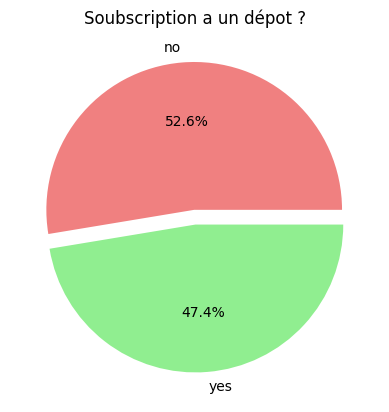

In [115]:
plt.title('Soubscription a un dépot ?')
df['deposit'].value_counts().plot(
        kind= 'pie',
        colors= ['lightcoral', 'lightgreen'],
        autopct='%1.1f%%',
        explode= (0.05, 0.05))
plt.ylabel('')
plt.xlabel('')
plt.show()

# 3.  Traitements des données

## 3 - 1 Gestions des valeurs non désirées (unknown)


* Nous avons donc dans notre jeux de données plusieurs colonnes avec des valeurs non désirées = VND


In [106]:
# Création du DataFrame_unknown
unknown = {'Name': ['job', 'education', 'contact', 'poutcome', 'poutcome'],
        'VND': ['unknown', 'unknown', 'unknown', 'unknown', 'other'],
        '%': [1, 4, 21, 75, 5]}

unknown = pd.DataFrame(unknown)

display(unknown)

,Name,VND,%
0,job,unknown,1
1,education,unknown,4
2,contact,unknown,21
3,poutcome,unknown,75
4,poutcome,other,5


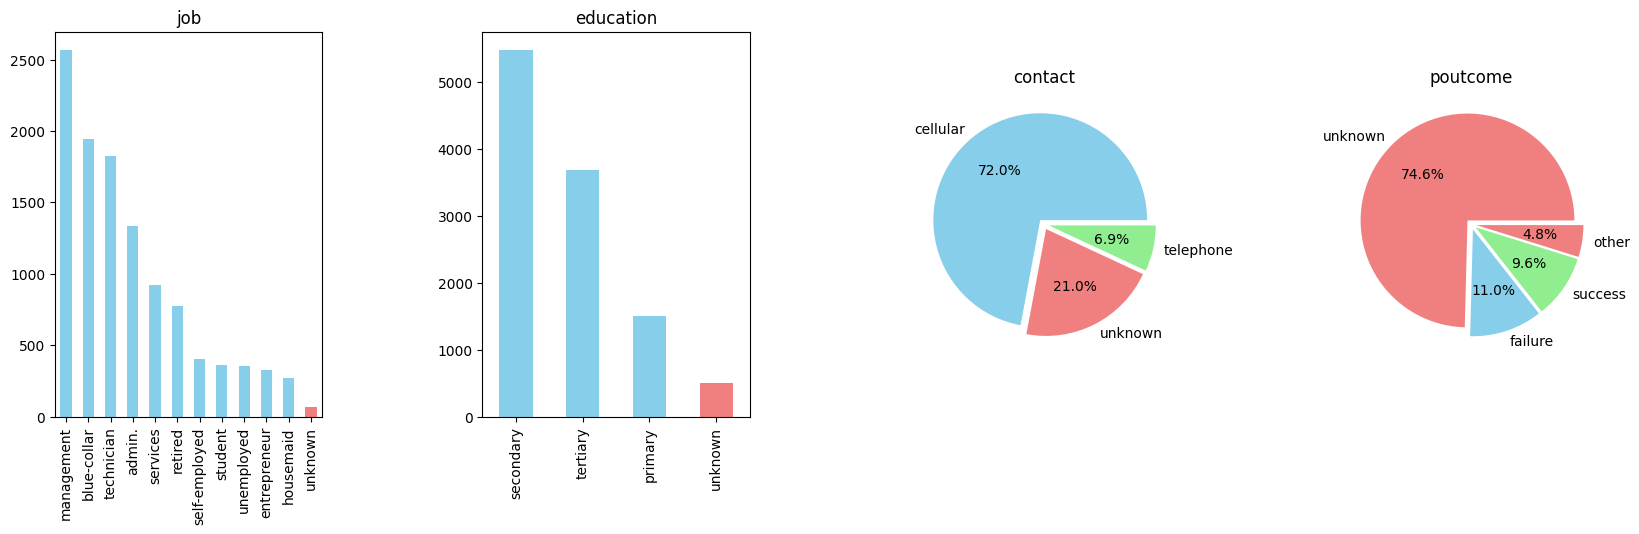

In [107]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Une ligne, quatre colonnes

#1 ### Job
axs[0].set_title('job')
df['job'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'lightcoral'],
    ax=axs[0]
)
axs[0].set_ylabel('')
axs[0].set_xlabel('')

#2 ### Education
axs[1].set_title('education')
df['education'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'skyblue', 'skyblue', 'lightcoral'],
    ax=axs[1]
)
axs[1].set_ylabel('')
axs[1].set_xlabel('')

#3 ### Contact
axs[2].set_title('contact')
df['contact'].value_counts().plot(
    kind='pie',
    colors=['skyblue', 'lightcoral', 'lightgreen'],
    autopct='%1.1f%%',
    explode=(0.05, 0.05, 0.05),
    ax=axs[2]
)
axs[2].set_ylabel('')
axs[2].set_xlabel('')

#4 ### Poutcome
axs[3].set_title('poutcome')
df['poutcome'].value_counts().plot(
    kind='pie',
    colors=['lightcoral', 'skyblue', 'lightgreen', 'lightcoral'],
    autopct='%1.1f%%',
    explode=(0.05, 0.05, 0.05, 0.05),
    ax=axs[3]
)
axs[3].set_ylabel('')
axs[3].set_xlabel('')

fig.subplots_adjust(wspace=0.6, hspace=0.8)
plt.show()


* Les graphiques précédents, représentent visuellement les valeurs **unknown** dans nos variables
* Pour les colonnes '**job**', et '**education**' nous allons supprimer ces
lignes car le % est très faible.
* La colonne '**contact**' ne nous interesse pas dans notre cas metier, nous allons donc la supprimer.
* Pour la colonne '**poutcome**', il semble ideal de créer une categorie pour regrouper les valeurs '**unknown**' et '**other**', qui représentent à eux deux 80%  

* Suppression des valeurs non désirées, et de la colonne contact


In [108]:
df = df.drop('contact', axis=1)

In [109]:
df_drop = df[df['job'] != 'unknown']
df_drop = df_drop.reset_index(drop=True)
df_drop.shape

(11092, 16)

In [110]:
df_drop = df_drop[df_drop['education'] != 'unknown']
df_drop = df_drop.reset_index(drop=True)
df_drop.shape

(10634, 16)

In [111]:
rows_drop = df.shape[0] - df_drop.shape[0]
print(f"Nous avons supprimé {rows_drop} lignes, soit {round((rows_drop / df.shape[0] * 100), 2) } % des valeurs.")

Nous avons supprimé 528 lignes, soit 4.73 % des valeurs.


* Fusion de **other** et **unknown** de la colonne **poutcome**

In [112]:
df_drop['poutcome'] = df_drop['poutcome'].replace('other', 'unknown')
df_drop['poutcome'].value_counts()

unknown    8453
failure    1176
success    1005
Name: poutcome, dtype: int64

## 3 - 2 Gestions des valeurs extrêmes et/ou obérantes
